In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
cc_default_prediction_dataset = pd.read_csv('./dataset/UCI_Credit_Card.csv')

In [5]:
cc_default_prediction_dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
cc_default_prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
cc_default_prediction_dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
  

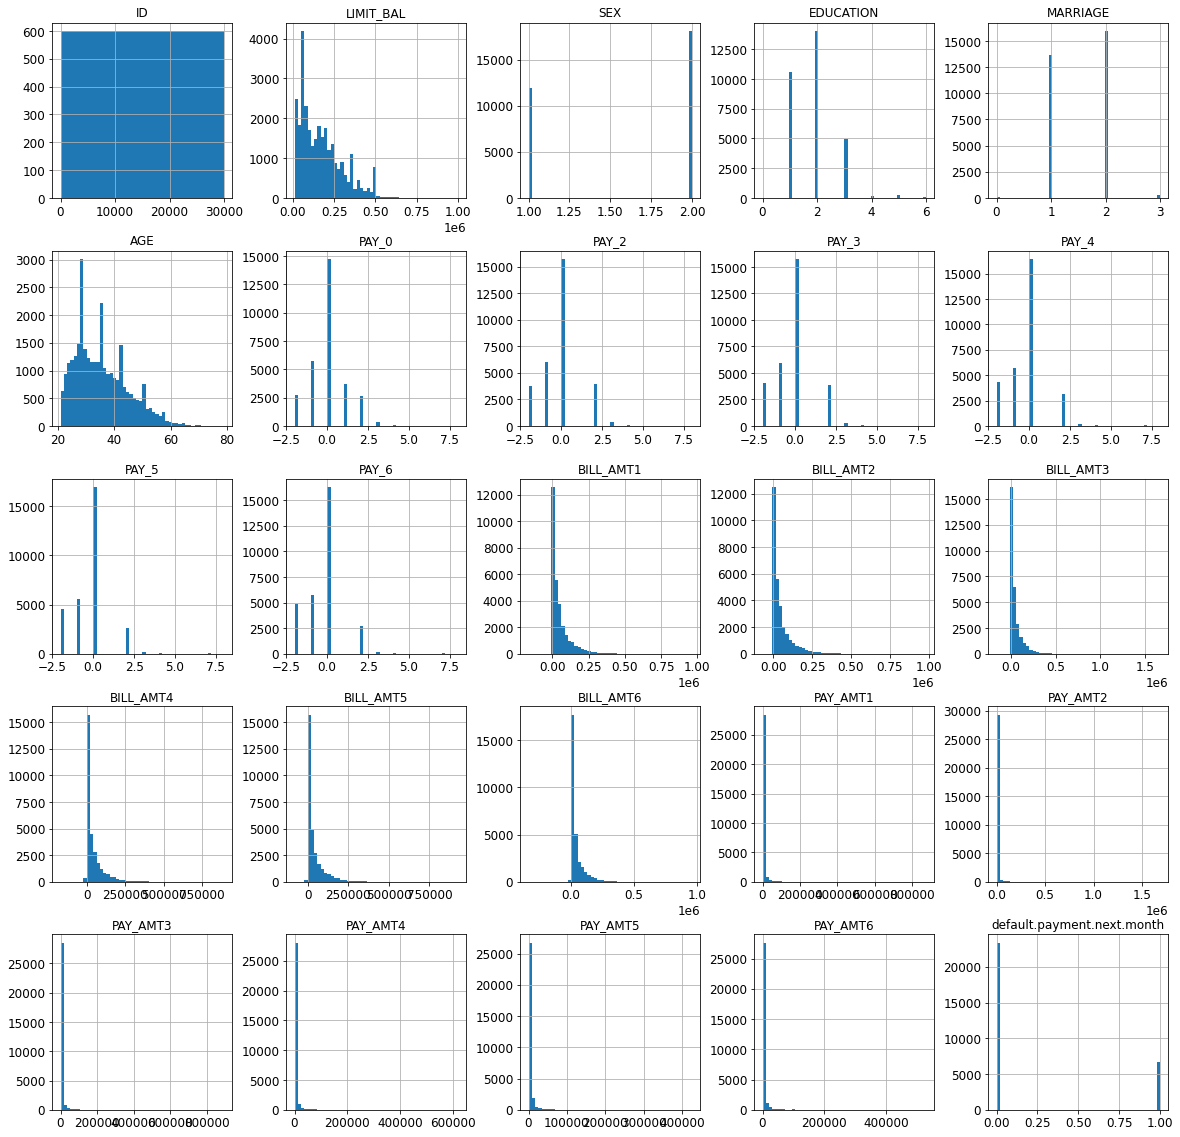

In [18]:
cc_default_prediction_dataset.hist(bins=50, figsize=(20,20))

In [9]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.33, random_state=42)

In [22]:
for train_index, test_index in split.split(cc_default_prediction_dataset, cc_default_prediction_dataset['EDUCATION']):
    strat_ccd_train_set = cc_default_prediction_dataset.loc[train_index]
    strat_ccd_test_set = cc_default_prediction_dataset.loc[test_index]

In [24]:
strat_ccd_train_set['EDUCATION'].value_counts()

2    9400
1    7092
3    3294
5     188
4      83
6      34
0       9
Name: EDUCATION, dtype: int64

In [25]:
strat_ccd_test_set['EDUCATION'].value_counts()

2    4630
1    3493
3    1623
5      92
4      40
6      17
0       5
Name: EDUCATION, dtype: int64

In [32]:
strat_ccd_train_set['SEX'].value_counts()

2    12094
1     8006
Name: SEX, dtype: int64

In [33]:
strat_ccd_test_set['SEX'].value_counts()

2    6018
1    3882
Name: SEX, dtype: int64

In [34]:
strat_ccd_train_set['MARRIAGE'].value_counts()

2    10749
1     9116
3      199
0       36
Name: MARRIAGE, dtype: int64

In [35]:
strat_ccd_test_set['MARRIAGE'].value_counts()

2    5215
1    4543
3     124
0      18
Name: MARRIAGE, dtype: int64

In [10]:
ccd_train_set, ccd_test_set = train_test_split(cc_default_prediction_dataset, test_size=0.33, random_state=42)

In [11]:
ccd_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20100 entries, 16831 to 23654
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          20100 non-null  int64  
 1   LIMIT_BAL                   20100 non-null  float64
 2   SEX                         20100 non-null  int64  
 3   EDUCATION                   20100 non-null  int64  
 4   MARRIAGE                    20100 non-null  int64  
 5   AGE                         20100 non-null  int64  
 6   PAY_0                       20100 non-null  int64  
 7   PAY_2                       20100 non-null  int64  
 8   PAY_3                       20100 non-null  int64  
 9   PAY_4                       20100 non-null  int64  
 10  PAY_5                       20100 non-null  int64  
 11  PAY_6                       20100 non-null  int64  
 12  BILL_AMT1                   20100 non-null  float64
 13  BILL_AMT2                  

In [13]:
ccd_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 2308 to 18451
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9900 non-null   int64  
 1   LIMIT_BAL                   9900 non-null   float64
 2   SEX                         9900 non-null   int64  
 3   EDUCATION                   9900 non-null   int64  
 4   MARRIAGE                    9900 non-null   int64  
 5   AGE                         9900 non-null   int64  
 6   PAY_0                       9900 non-null   int64  
 7   PAY_2                       9900 non-null   int64  
 8   PAY_3                       9900 non-null   int64  
 9   PAY_4                       9900 non-null   int64  
 10  PAY_5                       9900 non-null   int64  
 11  PAY_6                       9900 non-null   int64  
 12  BILL_AMT1                   9900 non-null   float64
 13  BILL_AMT2                   9

In [26]:
ccd_train_set['EDUCATION'].value_counts()

2    9355
1    7145
3    3284
5     190
4      82
6      37
0       7
Name: EDUCATION, dtype: int64

In [27]:
ccd_test_set['EDUCATION'].value_counts()

2    4675
1    3440
3    1633
5      90
4      41
6      14
0       7
Name: EDUCATION, dtype: int64

In [30]:
ccd_train_set['SEX'].value_counts()

2    12168
1     7932
Name: SEX, dtype: int64

In [31]:
ccd_test_set['SEX'].value_counts()

2    5944
1    3956
Name: SEX, dtype: int64

In [36]:
ccd_train_set['MARRIAGE'].value_counts()

2    10660
1     9191
3      217
0       32
Name: MARRIAGE, dtype: int64

In [39]:
ccd_test_set['MARRIAGE'].value_counts()

2    5304
1    4468
3     106
0      22
Name: MARRIAGE, dtype: int64

In [40]:
ccd_train_set.to_csv('./dataset/credit_card_default_train.csv')

In [41]:
ccd_test_set.to_csv('./dataset/credit_card_default_test.csv')

In [42]:
ccd_train_set_copy = ccd_train_set.copy()

In [ ]:
ccd_train_set_copy.corr()